## **Import required packages**

In [1066]:
import pandas as pd
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## **Import source data**

In [1067]:
# Load CSVs and assign to variables
customers = pd.read_csv("/Users/joelkeeble/Documents/GitHub/ITFC_Marketing_I-A/source_data/CustomerDetail-Table 1.csv")
memberships = pd.read_csv("/Users/joelkeeble/Documents/GitHub/ITFC_Marketing_I-A/source_data/membership-Table 1.csv")
merchandise = pd.read_csv("/Users/joelkeeble/Documents/GitHub/ITFC_Marketing_I-A/source_data/Merchandise-Table 1.csv")
email = pd.read_csv("/Users/joelkeeble/Documents/GitHub/ITFC_Marketing_I-A/source_data/ContactCommunicationAggregate-Table 1.csv")
tickets = pd.read_csv("/Users/joelkeeble/Documents/GitHub/ITFC_Marketing_I-A/source_data/Tickets-Table 1.csv")
totals = pd.read_csv("/Users/joelkeeble/Documents/GitHub/ITFC_Marketing_I-A/source_data/TotalValueStatic-Table 1.csv")

## **Data exploration - Customers**

In [1068]:
# Basic info for customers
print("Customer Data Info")
customers.info()
print("\nMissing values:")
print(customers.isnull().sum())

# Sample values for customers
print("\nSample rows:")
print(customers.head())

# Date parsing check
for col in ['arrivaldate', 'SSOcreatedate', 'activityscale']:
    if col in customers.columns:
        print(f"\nUnique formats in '{col}':")
        print(customers[col].dropna().astype(str).str[:10].value_counts().head())


Customer Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GroupID        180 non-null    int64  
 1   arrivaldate    180 non-null    object 
 2   SSOcreatedate  89 non-null     object 
 3   activityscale  180 non-null    object 
 4   Unnamed: 4     0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.2+ KB

Missing values:
GroupID            0
arrivaldate        0
SSOcreatedate     91
activityscale      0
Unnamed: 4       180
dtype: int64

Sample rows:
   GroupID     arrivaldate  SSOcreatedate   activityscale  Unnamed: 4
0   111578  12/12/21 16:45            NaN    7/6/25 21:20         NaN
1    32438  12/12/21 16:45            NaN   1/12/25 13:29         NaN
2  1303877    7/18/24 5:05            NaN  10/23/24 13:00         NaN
3   118942  12/12/21 16:45  6/28/23 17:44    7/6/25 17:56         NaN
4    736

## **Data exploration - Memberships**

In [1069]:
# Basic info for memberships
print("Membership Data Info")
memberships.info()
print("\nMissing values:")
print(memberships.isnull().sum())

# Duplicate GroupIDs (i.e. multiple membershipss)
print("\nDuplicate GroupIDs (i.e. multiple memberships):")
print(memberships['GroupID'].value_counts().value_counts().sort_index())

# membership types
print("\nMemberships Types Distribution:")
print(memberships['membershiptype'].value_counts())

# Spend
print("\nTransaction Price Summary:")
print(memberships['transactionprice'].describe())


Membership Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   GroupID                  420 non-null    int64 
 1   membershiptypeID         420 non-null    object
 2   transactionprice         420 non-null    object
 3   transactionpurchasedate  420 non-null    object
 4   membershiptype           420 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.5+ KB

Missing values:
GroupID                    0
membershiptypeID           0
transactionprice           0
transactionpurchasedate    0
membershiptype             0
dtype: int64

Duplicate GroupIDs (i.e. multiple memberships):
count
1     33
2     48
3     13
4     18
5      6
6      4
8      1
9      1
11     2
12     1
13     1
14     3
20     1
Name: count, dtype: int64

Memberships Types Distribution:
membershiptype
2024/25 Super Blues Membership  

## **Data exploration - Merchandise**

In [1070]:
print("Merchandise Data Info")
merchandise.info()
print("\nMissing values:")
print(merchandise.isnull().sum())

print("\nOrder Value Summary:")
print(merchandise['ordervalue'].describe())

print("\nOrders per GroupID:")
print(merchandise['GroupID'].value_counts().value_counts().sort_index())


Merchandise Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GroupID                  310 non-null    int64  
 1   orderID                  310 non-null    object 
 2   transactionpurchasedate  310 non-null    object 
 3   ordervalue               310 non-null    object 
 4   Unnamed: 4               0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.2+ KB

Missing values:
GroupID                      0
orderID                      0
transactionpurchasedate      0
ordervalue                   0
Unnamed: 4                 310
dtype: int64

Order Value Summary:
count            310
unique           131
top        £\t55.00 
freq              14
Name: ordervalue, dtype: object

Orders per GroupID:
count
1     21
2     12
3      9
4      3
5      8
6      7
7      3
8      2
9      1
10

## **Data exploration - Tickets**

In [1071]:
print("Ticket Data Info")
tickets.info()
print("\nMissing values:")
print(tickets.isnull().sum())

print("\nTransaction Price Summary:")
print(tickets['transactionprice'].describe())

print("\nUnique matches per customer:")
print(tickets.groupby('GroupID')['occasionID'].nunique().describe())

print("\nTicket Bands Distribution:")
print(tickets['ticketband'].value_counts())


Ticket Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GroupID                  200 non-null    int64  
 1   occasionID               200 non-null    object 
 2   transactionpurchasedate  200 non-null    object 
 3   transactionprice         200 non-null    object 
 4   area                     200 non-null    object 
 5   block                    167 non-null    object 
 6   row                      167 non-null    object 
 7   seat                     167 non-null    float64
 8   ticketband               200 non-null    object 
 9   occasionstartdate        200 non-null    object 
 10  occasiondescription      200 non-null    object 
 11  opponentname             183 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 18.9+ KB

Missing values:
GroupID                     0
occasionID 

## **Data exploration - Email**

In [1072]:
print("Email Data Info")
email.info()
print("\nMissing values:")
print(email.isnull().sum())

# Engagement distribution
print("\nClick-through rate summary:")
print(email['emailsclickedpercentage'].describe())

print("\nOpen rate summary:")
print(email['emailsopenedpercentage'].describe())


Email Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   GroupID                  143 non-null    int64 
 1   numberemailssent         143 non-null    int64 
 2   numberemailsopened       143 non-null    int64 
 3   numberemailsclicked      143 non-null    int64 
 4   emailslastsent           143 non-null    object
 5   emailslastopened         136 non-null    object
 6   emailslastclicked        116 non-null    object
 7   emailsopenedpercentage   143 non-null    int64 
 8   emailsclickedpercentage  143 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 10.2+ KB

Missing values:
GroupID                     0
numberemailssent            0
numberemailsopened          0
numberemailsclicked         0
emailslastsent              0
emailslastopened            7
emailslastclicked          27
emailsopenedpercent

## **Data exploration - Totals**

In [1073]:
print("Totals Data Info")
totals.info()
print("\nMissing values:")
print(totals.isnull().sum())

# Spend columns
spend_cols = ['Ticket spend TOTAL', 'Membership spend TOTAL', 'Merchandise spend TOTAL', 'TOTAL spend']
print("\nTotal Spend Summary:")
print(totals[spend_cols].describe())

# Email engagement
print("\nEmail Engagement Summary:")
print(totals[['EmailOpenRate%', 'EmailClicksRate%']].describe())


Totals Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GroupID                  180 non-null    int64  
 1   Ticket spend TOTAL       180 non-null    object 
 2   Membership spend TOTAL   180 non-null    object 
 3   Merchandise spend TOTAL  180 non-null    object 
 4   TOTAL spend              180 non-null    object 
 5   EmailsSent               143 non-null    float64
 6   EmailOpenRate%           143 non-null    float64
 7   EmailClicksRate%         143 non-null    float64
 8   SSOCreateDate            89 non-null     object 
 9   ActivityScale            180 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 14.2+ KB

Missing values:
GroupID                     0
Ticket spend TOTAL          0
Membership spend TOTAL      0
Merchandise spend TOTAL     0
TOTAL spend                 0


## **Data Cleaning**

In [1074]:
# Handle missing values
customers.fillna(0, inplace=True)
memberships.fillna(0, inplace=True)
merchandise.fillna(0, inplace=True)
email.fillna(0, inplace=True)
tickets.fillna(0, inplace=True)
totals.fillna(0, inplace=True)

In [1075]:
# Drop unnecessary columns caused by stray commas in the CSV
customers = customers.loc[:, ~customers.columns.str.startswith('Unnamed:')]
memberships = memberships.loc[:, ~memberships.columns.str.startswith('Unnamed:')]
merchandise = merchandise.loc[:, ~merchandise.columns.str.startswith('Unnamed:')]
email = email.loc[:, ~email.columns.str.startswith('Unnamed:')]
tickets = tickets.loc[:, ~tickets.columns.str.startswith('Unnamed:')]
totals = totals.loc[:, ~totals.columns.str.startswith('Unnamed:')]

## **Feature Engineering**

**Merchandise Data**

In [1076]:
# Feature engineering for merchandise data

# Replace pound signs
merchandise['ordervalue'] = merchandise['ordervalue'].replace({'£': '', '\t': ''}, regex=True)

# Ensure order value is numeric
merchandise['ordervalue'] = pd.to_numeric(merchandise['ordervalue'], errors='coerce')

# Group by GroupID and calculate required stats
merch_summary = merchandise.groupby('GroupID').agg(
    merch_transaction_count=('ordervalue', 'count'),
    avg_merch_order_value=('ordervalue', 'mean')
).reset_index()

display(merch_summary)

,GroupID,merch_transaction_count,avg_merch_order_value
0,1355,5,77.600000
1,2395,6,53.166667
2,2780,1,64.000000
3,4524,6,35.333333
4,6640,2,57.000000
...,...,...,...
68,100001232,8,43.875000
69,100001795,2,49.000000
70,100004460,10,76.925000
71,100007906,4,46.125000


**Membership Data**

In [1077]:
# Replace pound signs
memberships['transactionprice'] = memberships['transactionprice'].replace({'£': '', '\t': ''}, regex=True)

# Ensure dates and prices are in correct format
memberships['transactionpurchasedate'] = pd.to_datetime(memberships['transactionpurchasedate'], errors='coerce')
memberships['transactionprice'] = pd.to_numeric(memberships['transactionprice'], errors='coerce')

# Group by GroupID
membership_summary = memberships.groupby('GroupID').agg(
    membership_transaction_count=('transactionprice', 'count'),
    first_membership_date=('transactionpurchasedate', 'min'),
    last_membership_date=('transactionpurchasedate', 'max')
).reset_index()

display(membership_summary)


/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/1408960017.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  memberships['transactionpurchasedate'] = pd.to_datetime(memberships['transactionpurchasedate'], errors='coerce')


,GroupID,membership_transaction_count,first_membership_date,last_membership_date
0,785,2,2023-11-05 19:31:00,2024-07-16 12:24:00
1,1355,13,2010-04-16 00:00:00,2023-07-13 14:31:00
2,2395,3,2015-10-02 00:00:00,2023-07-26 12:21:00
3,2780,4,2010-03-16 00:00:00,2024-07-18 15:32:00
4,4524,1,2017-09-29 00:00:00,2017-09-29 00:00:00
...,...,...,...,...
127,100004460,2,2023-04-20 11:20:00,2023-04-20 11:20:00
128,100004796,2,2023-07-30 20:35:00,2024-08-05 09:49:00
129,100007906,2,2023-07-13 10:07:00,2024-07-16 13:19:00
130,100008069,2,2023-07-17 18:53:00,2024-08-18 14:11:00


**Ticket Data**

In [1078]:


# Ensure GroupID is string
tickets['GroupID'] = tickets['GroupID'].astype(str)

# Clean and convert transactionprice
tickets['transactionprice'] = (
    tickets['transactionprice']
    .replace('[£$,]', '', regex=True)
    .astype(str)
    .str.strip()
    .replace('', pd.NA)
)
tickets['transactionprice'] = pd.to_numeric(tickets['transactionprice'], errors='coerce')

# Convert date
tickets['transactionpurchasedate'] = pd.to_datetime(tickets['transactionpurchasedate'], errors='coerce')

# Aggregate per GroupID
ticket_summary = tickets.groupby('GroupID').agg(
    ticket_transaction_count=('transactionprice', 'count'),
    average_ticket_price=('transactionprice', 'mean'),
    first_ticket_purchase=('transactionpurchasedate', 'min'),
    last_ticket_purchase=('transactionpurchasedate', 'max')
).reset_index()

# Most frequent ticket band per user
ticketband_mode = tickets.groupby('GroupID')['ticketband']\
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)\
    .reset_index().rename(columns={'ticketband': 'most_common_ticketband'})

# Merge with ticket_summary
ticket_summary = ticket_summary.merge(ticketband_mode, on='GroupID', how='left')


display(ticket_summary)


/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/2870925307.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tickets['transactionpurchasedate'] = pd.to_datetime(tickets['transactionpurchasedate'], errors='coerce')


,GroupID,ticket_transaction_count,average_ticket_price,first_ticket_purchase,last_ticket_purchase,most_common_ticketband
0,100000603,1,36.0,2024-09-23 10:17:00,2024-09-23 10:17:00,Adult
1,100001198,2,0.0,2025-03-11 11:23:00,2025-04-01 16:36:00,ITFC Academy (ITFC Academy)
2,100001211,1,20.0,2024-07-22 14:31:00,2024-07-22 14:31:00,Adult
3,100001232,1,32.0,2024-08-09 10:05:00,2024-08-09 10:05:00,Adult
4,100001795,1,15.0,2024-12-17 10:04:00,2024-12-17 10:04:00,Under 22
...,...,...,...,...,...,...
175,94221,1,15.0,2025-01-27 10:03:00,2025-01-27 10:03:00,Adult
176,94244,1,32.0,2024-11-04 10:28:00,2024-11-04 10:28:00,Adult
177,97154,1,0.0,2024-12-11 11:44:00,2024-12-11 11:44:00,Ballot Entry
178,98060,1,381.0,2024-03-26 20:31:00,2024-03-26 20:31:00,Adult


**Totals Data**

In [1079]:
totals['Ticket spend TOTAL'] = totals['Ticket spend TOTAL'].str.replace('£', '').astype(float)
totals['Merchandise spend TOTAL'] = totals['Merchandise spend TOTAL'].str.replace('£', '')
totals['Merchandise spend TOTAL'] = totals['Merchandise spend TOTAL'].str.replace(',', '').astype(float)
totals['TOTAL spend'] = totals['TOTAL spend'].str.replace('£', '')
totals['TOTAL spend'] = totals['TOTAL spend'].str.replace(',', '').astype(float)
totals['Membership spend TOTAL'] = totals['Membership spend TOTAL'].str.replace('£', '')
totals['Membership spend TOTAL'] = totals['Membership spend TOTAL'].str.replace(',', '').astype(float)

**Email Data**

In [1080]:

# Calculate email engagement score: clicks weighted twice as much as opens
email['email_engagement_score'] = email['emailsopenedpercentage'] + 2 * email['emailsclickedpercentage']

**Customer Data**

In [1081]:
# Create a new boolean column indicating online presence
customers['has_online_presence'] = (customers['SSOcreatedate'].astype(str) != "0").astype(int)

# Convert to datetime
customers['arrivaldate'] = pd.to_datetime(customers['arrivaldate'], dayfirst=True, errors='coerce')
customers['activityscale'] = pd.to_datetime(customers['activityscale'], dayfirst=True, errors='coerce')

# Use today's date
today = datetime.today()

# Calculate tenure days (while columns are still datetime)
customers['total_tenure_days'] = (today - customers['arrivaldate']).dt.days
customers['last_activity_days'] = (today - customers['activityscale']).dt.days

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/37528034.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['arrivaldate'] = pd.to_datetime(customers['arrivaldate'], dayfirst=True, errors='coerce')
/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/37528034.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers['activityscale'] = pd.to_datetime(customers['activityscale'], dayfirst=True, errors='coerce')


**Merge all engineered features into main dataframe**

In [1082]:
# Convert GroupID to string for merging
customers['GroupID'] = customers['GroupID'].astype(str)
merch_summary['GroupID'] = merch_summary['GroupID'].astype(str)
membership_summary['GroupID'] = membership_summary['GroupID'].astype(str)
ticket_summary['GroupID'] = ticket_summary['GroupID'].astype(str)
totals['GroupID'] = totals['GroupID'].astype(str)
email['GroupID'] = email['GroupID'].astype(str)

# Merge summaries onto customers DataFrame
df = customers.merge(merch_summary, on="GroupID", how="left") \
              .merge(membership_summary, on="GroupID", how="left") \
              .merge(ticket_summary, on="GroupID", how="left")\
              .merge(totals, on="GroupID", how="left")\
              .merge(email, on="GroupID", how="left")

# Handle missing values
df.fillna(0, inplace=True)

display(df)


/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/579286406.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


,GroupID,arrivaldate,SSOcreatedate,activityscale,has_online_presence,total_tenure_days,last_activity_days,merch_transaction_count,avg_merch_order_value,membership_transaction_count,...,ActivityScale,numberemailssent,numberemailsopened,numberemailsclicked,emailslastsent,emailslastopened,emailslastclicked,emailsopenedpercentage,emailsclickedpercentage,email_engagement_score
0,111578,2021-12-12 16:45:00,0,2025-06-07 21:20:00,0,1316,43,0.0,0.000000,2.0,...,7/6/25 21:20,901.0,873.0,19.0,7/5/25 9:00,7/5/25 9:44,6/26/25 13:53,96.0,2.0,100.0
1,32438,2021-12-12 16:45:00,0,2025-12-01 13:29:00,0,1316,-134,0.0,0.000000,0.0,...,1/12/25 13:29,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
2,1303877,2024-07-18 05:05:00,0,2024-10-23 13:00:00,0,367,270,0.0,0.000000,0.0,...,10/23/24 13:00,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0
3,118942,2021-12-12 16:45:00,6/28/23 17:44,2025-06-07 17:56:00,1,1316,43,12.0,27.666667,4.0,...,7/6/25 17:56,956.0,392.0,112.0,7/6/25 13:00,7/6/25 17:56,7/6/25 17:56,41.0,11.0,63.0
4,73623,2021-12-12 16:45:00,6/30/23 9:49,2025-07-07 09:35:00,1,1316,13,11.0,47.726364,2.0,...,7/7/25 9:35,868.0,412.0,56.0,7/6/25 13:01,7/5/25 11:57,7/5/25 11:57,47.0,6.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,127480,2021-12-12 16:45:00,8/14/23 9:05,2025-05-24 12:04:00,1,1316,57,1.0,12.000000,2.0,...,5/24/25 12:04,156.0,2.0,0.0,7/5/25 9:00,5/24/25 12:04,0,1.0,0.0,1.0
176,61414,2021-12-12 16:45:00,0,2025-03-07 15:02:00,0,1316,135,5.0,32.920000,3.0,...,7/3/25 15:02,649.0,183.0,49.0,7/5/25 9:00,7/3/25 15:02,7/3/25 15:02,28.0,7.0,42.0
177,864924,2023-03-04 11:47:00,5/1/24 21:09,2025-07-07 16:51:00,1,869,13,0.0,0.000000,0.0,...,7/7/25 16:51,561.0,554.0,2.0,7/5/25 9:00,7/5/25 9:45,7/28/23 23:01,98.0,0.0,98.0
178,27424,2021-12-12 16:45:00,8/11/24 19:32,2025-07-07 08:02:00,1,1316,13,3.0,36.333333,1.0,...,7/7/25 8:02,942.0,528.0,29.0,7/6/25 13:01,7/6/25 13:49,4/27/25 17:39,56.0,3.0,62.0


In [1083]:
# Columns you want to keep
selected_columns = [
    'GroupID',
    'merch_transaction_count',
    'avg_merch_order_value',
    'Merchandise spend TOTAL',
    'membership_transaction_count',
    'Membership spend TOTAL',
    'ticket_transaction_count',
    'average_ticket_price',
    'most_common_ticketband',
    'Ticket spend TOTAL',
    'TOTAL spend',
    'email_engagement_score',
    'emailsopenedpercentage',
    'emailsclickedpercentage',
    'has_online_presence',
    'total_tenure_days',
    'last_activity_days'
]

# Create the final dataframe
final_df = df[selected_columns].copy()

display(final_df)


,GroupID,merch_transaction_count,avg_merch_order_value,Merchandise spend TOTAL,membership_transaction_count,Membership spend TOTAL,ticket_transaction_count,average_ticket_price,most_common_ticketband,Ticket spend TOTAL,TOTAL spend,email_engagement_score,emailsopenedpercentage,emailsclickedpercentage,has_online_presence,total_tenure_days,last_activity_days
0,111578,0.0,0.000000,0.00,2.0,79.98,1,32.0,Senior 65+,32.0,111.98,100.0,96.0,2.0,0,1316,43
1,32438,0.0,0.000000,0.00,0.0,114.96,2,10.0,AW Adult,10.0,124.96,0.0,0.0,0.0,0,1316,-134
2,1303877,0.0,0.000000,0.00,0.0,304.93,1,34.0,AW Adult,34.0,338.93,0.0,0.0,0.0,0,367,270
3,118942,12.0,27.666667,332.00,4.0,93.49,1,7.0,Adult,7.0,432.49,63.0,41.0,11.0,1,1316,43
4,73623,11.0,47.726364,524.99,2.0,214.93,1,30.0,Adult,30.0,769.92,59.0,47.0,6.0,1,1316,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,127480,1.0,12.000000,12.00,2.0,79.98,1,41.0,Adult,41.0,132.98,1.0,1.0,0.0,1,1316,57
176,61414,5.0,32.920000,164.60,3.0,214.93,1,36.0,Adult,36.0,415.53,42.0,28.0,7.0,0,1316,135
177,864924,0.0,0.000000,0.00,0.0,414.90,1,595.0,Adult,595.0,1009.90,98.0,98.0,0.0,1,869,13
178,27424,3.0,36.333333,109.00,1.0,99.98,1,15.0,Adult,15.0,223.98,62.0,56.0,3.0,1,1316,13


## **Segmentation**

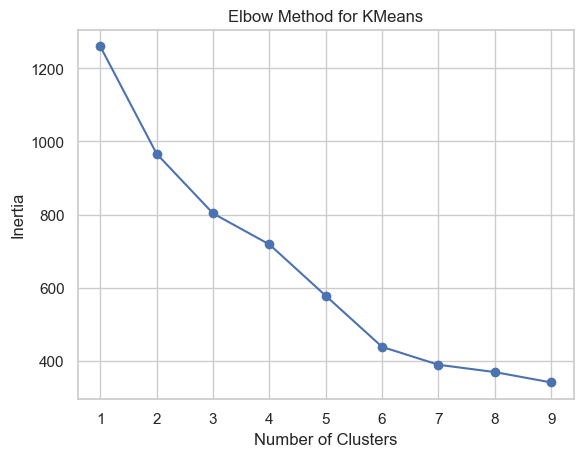

In [1084]:
# Select features
#features = ['avg_merch_order_value', 'ticket_transaction_count', 'total_tenure_days','email_engagement_score','last_activity_days','has_online_presence', 'TOTAL spend', 'Merchandise spend TOTAL','Membership spend TOTAL','Ticket spend TOTAL']  
features = ['TOTAL spend', 'total_tenure_days', 'email_engagement_score', 'Merchandise spend TOTAL','Ticket spend TOTAL','Membership spend TOTAL', 'has_online_presence' ] 

X = final_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [1085]:
# Choose optimal k based on the elbow method
kmeans = KMeans(n_clusters=3, random_state=1)
final_df['segment'] = kmeans.fit_predict(X_scaled)

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/1386109084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='segment', y='TOTAL spend', palette=colors, ax=axes[0, 0])
/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/1386109084.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x='segment', y='Ticket spend TOTAL', palette=colors, ax=axes[0, 1])
/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_90601/1386109084.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(d

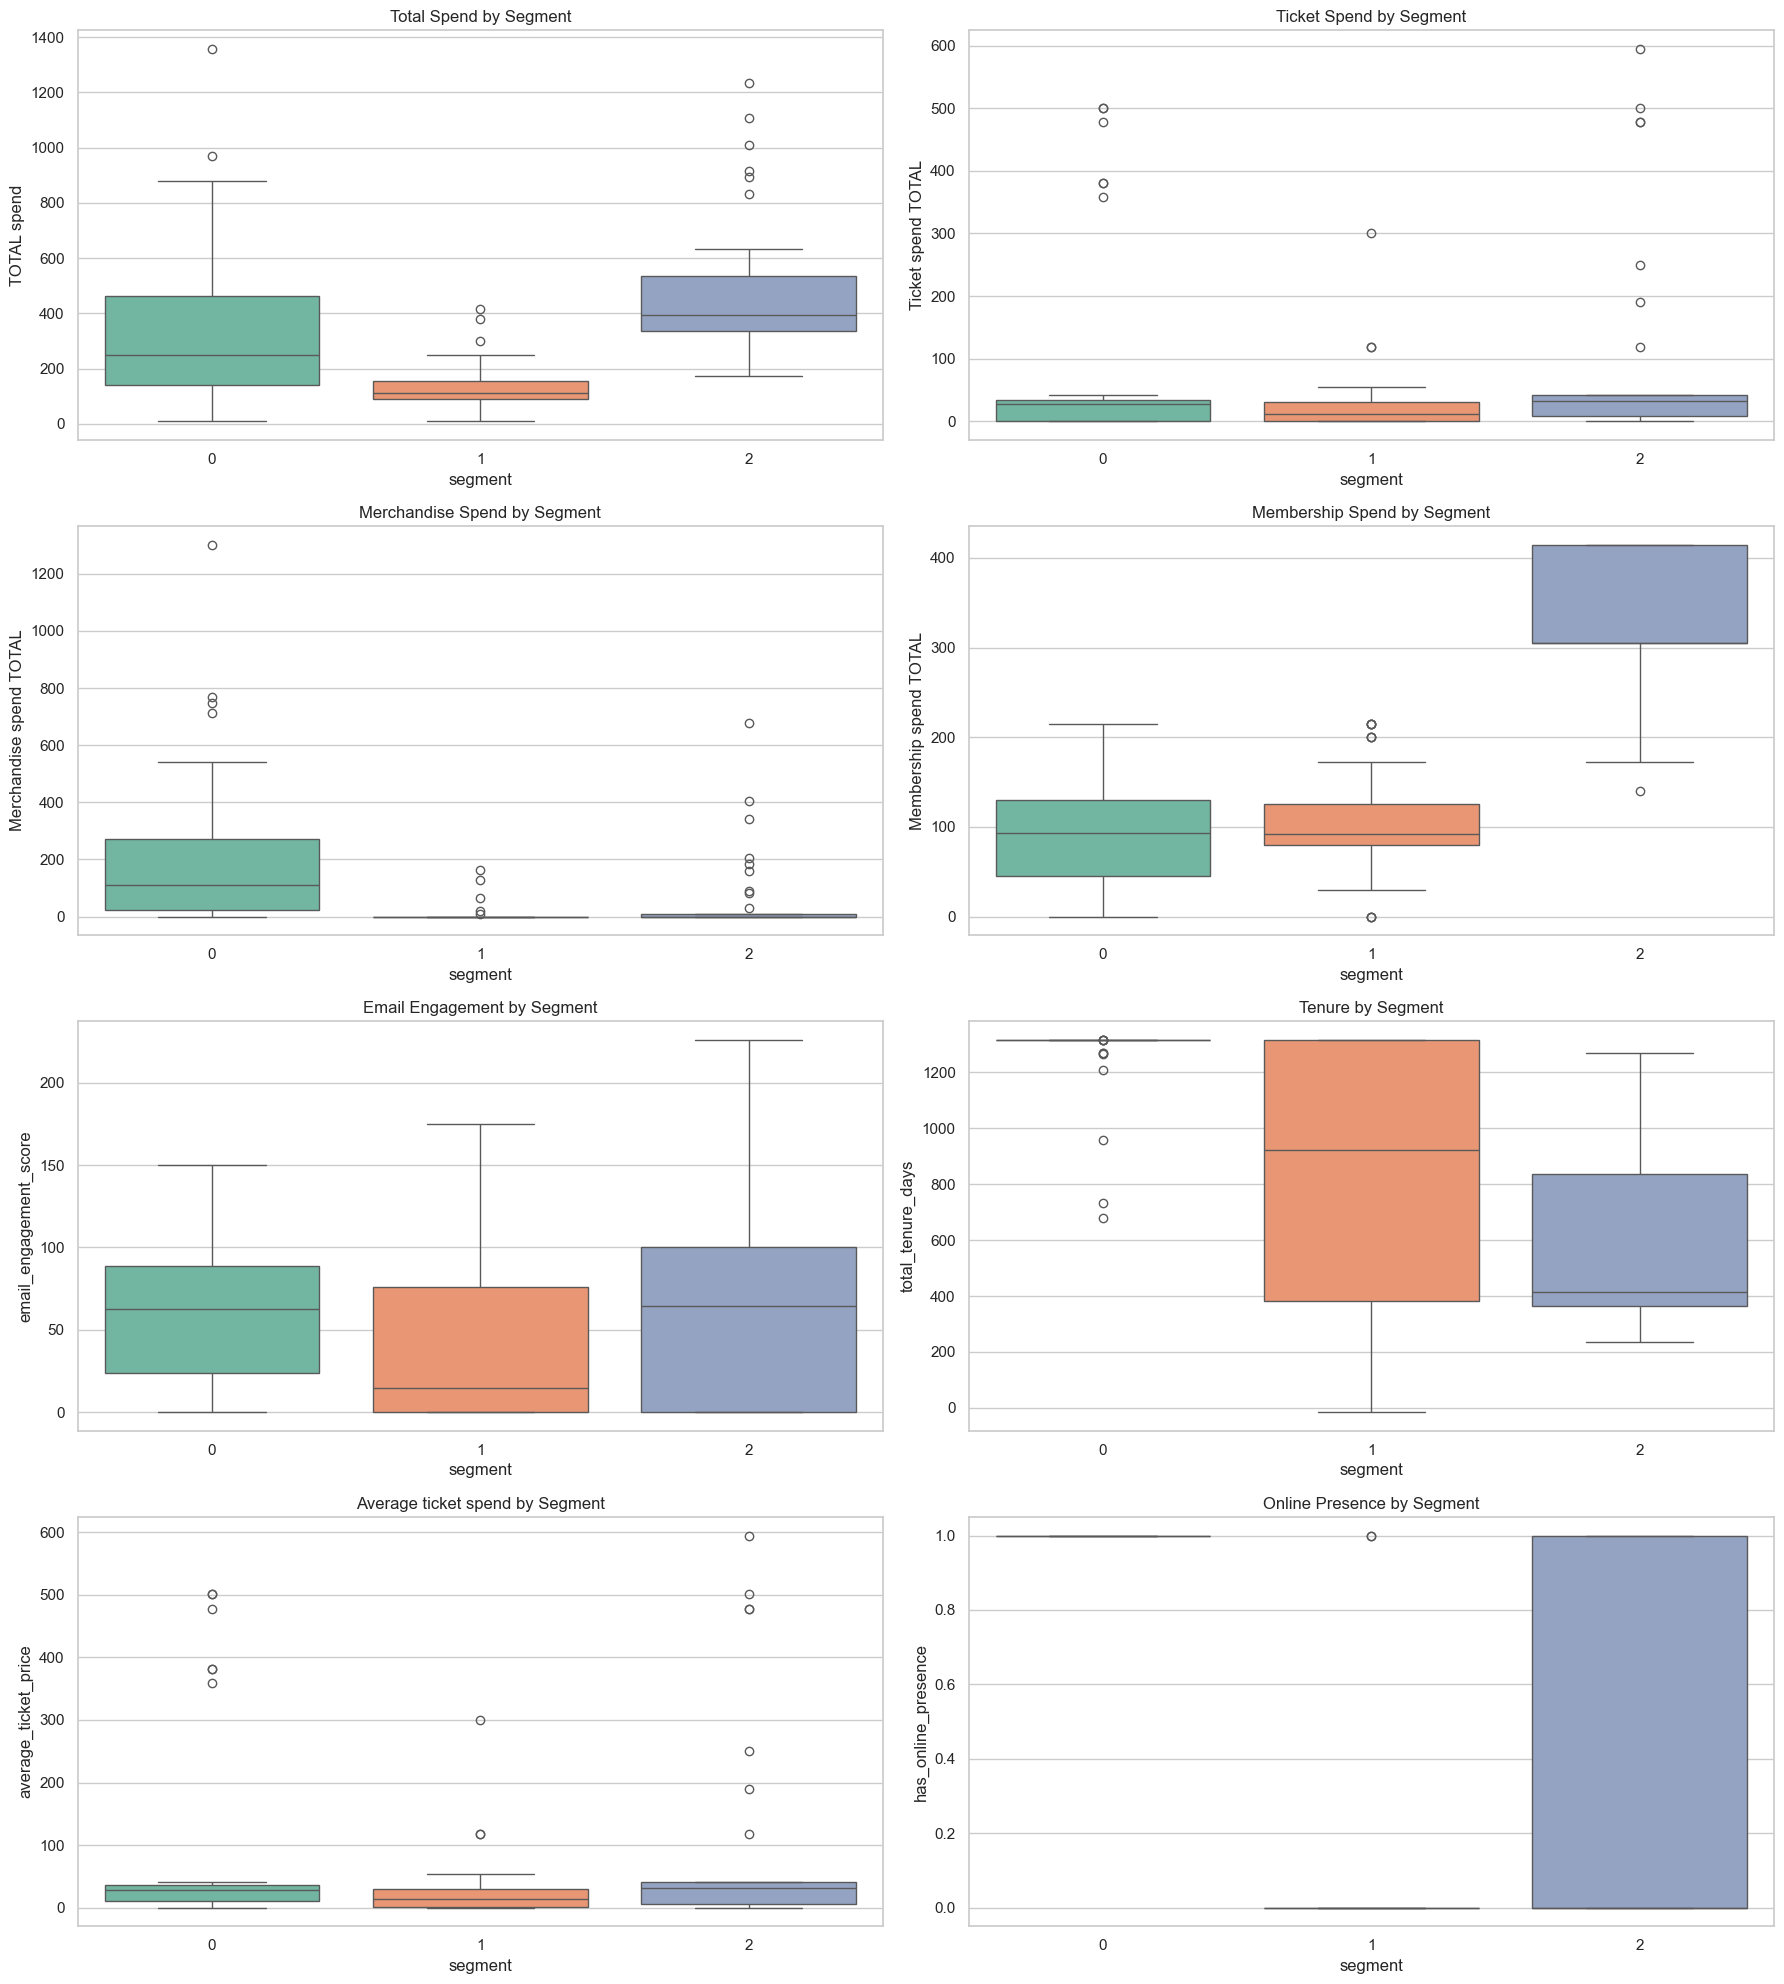

In [1086]:
# Ensure 'segment' is a categorical type for plotting
final_df['segment'] = pd.Categorical(final_df['segment'].astype(int), 
                                     categories=sorted(final_df['segment'].astype(int).unique()), 
                                     ordered=True)

# Create colour palette for segments
unique_segments = final_df['segment'].nunique()
colors = sns.color_palette("Set2", n_colors=unique_segments)

# Set up the dashboard layout
fig, axes = plt.subplots(4, 2, figsize=(18, 20))  # 4x2 grid

# Plot 1: Total Spend
sns.boxplot(data=final_df, x='segment', y='TOTAL spend', palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Total Spend by Segment')

# Plot 2: Ticket Spend
sns.boxplot(data=final_df, x='segment', y='Ticket spend TOTAL', palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Ticket Spend by Segment')

sns.boxplot(data=final_df, x='segment', y='Merchandise spend TOTAL', palette=colors, ax=axes[1, 0])
axes[1, 0].set_title('Merchandise Spend by Segment')

sns.boxplot(data=final_df, x='segment', y='Membership spend TOTAL', palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Membership Spend by Segment')

# Plot 3: Email Engagement
sns.boxplot(data=final_df, x='segment', y='email_engagement_score', palette=colors, ax=axes[2, 0])
axes[2, 0].set_title('Email Engagement by Segment')

# Plot 4: Tenure
sns.boxplot(data=final_df, x='segment', y='total_tenure_days', palette=colors, ax=axes[2, 1])
axes[2, 1].set_title('Tenure by Segment')

# Plot 3: Email Engagement
sns.boxplot(data=final_df, x='segment', y='average_ticket_price', palette=colors, ax=axes[3, 0])
axes[3, 0].set_title('Average ticket spend by Segment')

# Plot 4: Tenure
sns.boxplot(data=final_df, x='segment', y='has_online_presence', palette=colors, ax=axes[3, 1])
axes[3, 1].set_title('Online Presence by Segment')

# Tight layout and save the figure
plt.tight_layout()
plt.show()


## **Personas**

### **Cluster 0: Loyal Online Shopper**

**Persona:**

These customers have been around the longest, are consistently engaged online, and spend most of their money on merchandise. However, they invest the least in memberships. Their email engagement is moderate.

**Key Traits:**

- High merchandise spend

- Long tenure (most loyal)

- Strong online presence

**Engagement Actions:**

- Membership Upsell Campaign: Launch a targeted email series promoting the value of membership (e.g. exclusive discounts on merchandise to play into their current trends, early access to kits, or members-only events). Offer a free 1-month membership trial to convert them.

- Exclusive Merch Offers: Provide early access to new merchandise or special edition products only for members or long-tenured fans.

### **Cluster 1: Average Joes**

**Persona:**

These fans are relatively inactive, with minimal spending, no online footprint, and low engagement with marketing emails. However, they have a modest investment in memberships and a wide range of tenure lengths, indicating they’re a mixed group of users who may have been one off attendees to games or purchased gifts for loved ones.

**Key Traits:**

- Lowest total spend

- No online presence

- Middle membership spend

- Lowest email engagement

- Medium tenure (with large range)

- Little to no merchandise interest

**Engagement Actions:**

- Offline Engagement Strategy: Use postal campaigns or in-stadium promotions (e.g. matchday raffles, paper vouchers) to reach them without relying on digital channels.

- Create an “online onboarding” initiative: incentivize SSO account creation with a giveaway or first-time login reward like a £5 store credit or ticket discount.

### **Cluster 2: The High-Value New Fans**

**Persona:**

These are the most financially valuable fans, as they spend most across tickets and memberships, engage actively with emails, and have a range of tenures. They don’t buy much merchandise although there is a number of outliers, and they vary in online activity.

**Key Traits:**

- Highest total spend

- Highest ticket & membership spend

- Strong email engagement

- Mixed online presence

**Engagement Actions:**

- Loyalty Building Journey: Launch a “New Fan Onboarding Series”, such as welcome emails, club history highlights, player stories, and behind-the-scenes content to build long-term loyalty. Include exclusive perks for attending multiple games or renewing memberships.

- Merchandise Cross-Sell: Recommend team gear based on match attendance (e.g. offer scarf or kit discounts to ticket buyers). Use email segmentation to deliver personalized merch suggestions.

## **Next Steps**

- **Lifecycle/Journey Stage:** No explicit tracking of where a customer is in their lifecycle (e.g., prospect → active → lapsed → churned). Due to the number of variables, such as time since last purchase to be inactive or churned, lifecycle or journey phase can vary significantly, and so further discussion is required to implement such as system.

## **Gap Analysis**

- **Missing Behavioral Context:** No data on website interactions — e.g., page views, time on site, or clickstream data. Can provide initial interests in merchandise, memberships, etc. Understand what is driving conversions and drop off points. For this we could utilise Google Analytics or custom event tracking.

- **Fan Demographics:** No data on age, location, preferences, etc. These can greatly enhance personalisation and targeting, such as personalised messaging or geo-targeted offers. Could be obtained through surveys for discount or on newletter sign up.

## **Suggested KPIs**

- **Customer Lifetime Value (CLV):** Combines total spend and tenure to assess long-term worth of a fan. Estimates how much total revenue a customer is expected to bring to the club over the entire duration of their relationship with the team. Helps justify marketing spend on certainsegements

- **Email Engagement Score (or Sub-Metrics):** Open rate, click-through rate, and email activity recency. A custom score (often 0–100) based on how engaged a user is with the email campaigns. Predicts who is still reachable and who is tuning out. Great for segmenting users before campaigns (e.g., send exclusive offers to top 20% engagers).

- **Churn Risk %:** Based on inactivity, low spend, and low engagement score. Helps prioritise retention efforts. Could be implemented through rule based implementation for individual segements. Enables early intervention with win-back campaigns, and it is statistically cheaper to retain customers than to acquire new ones.